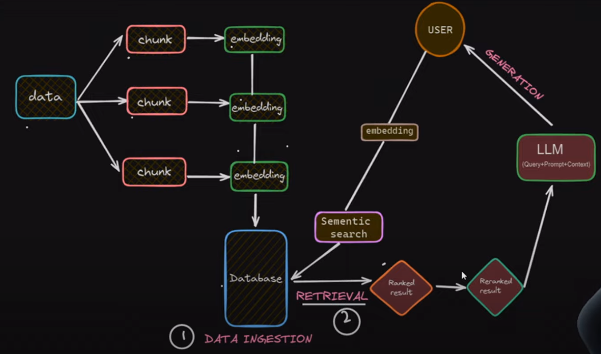

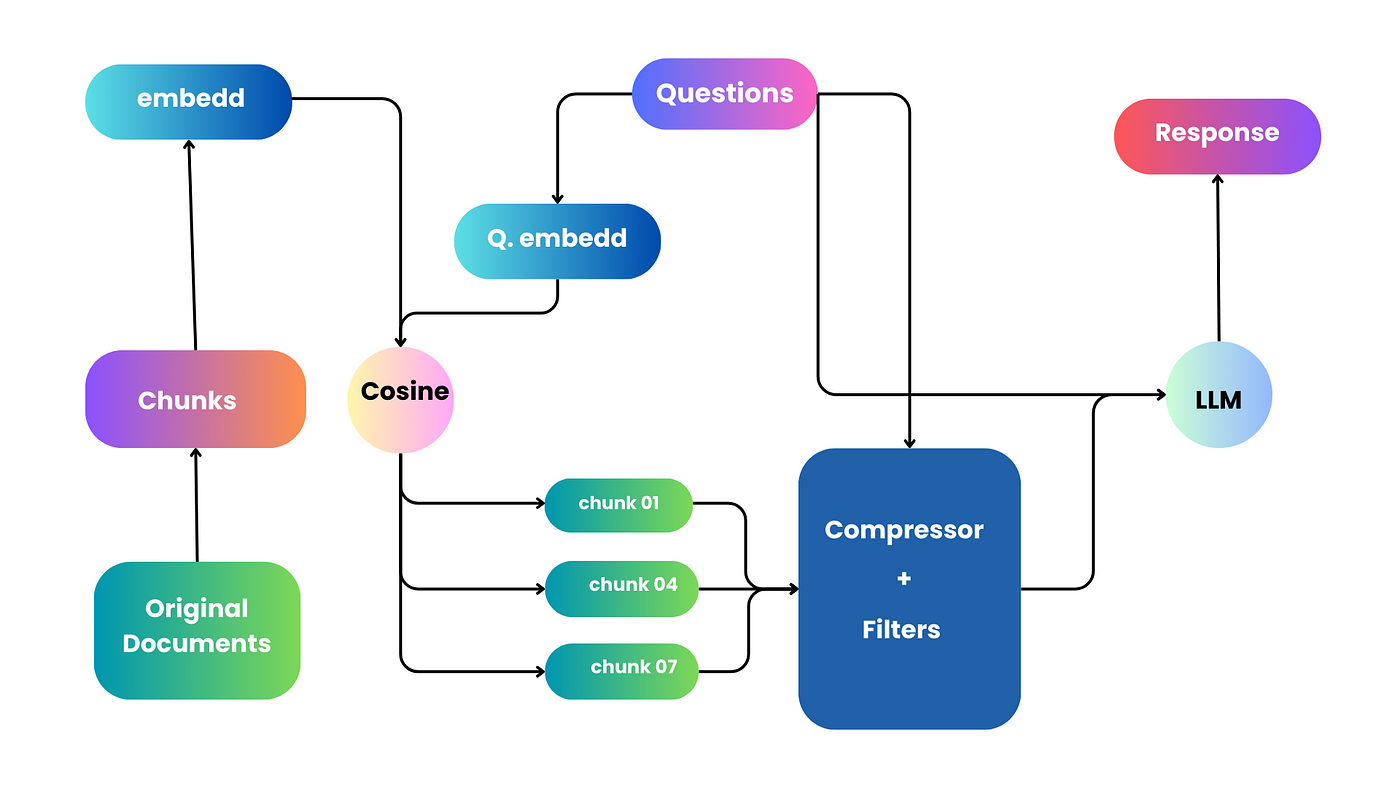
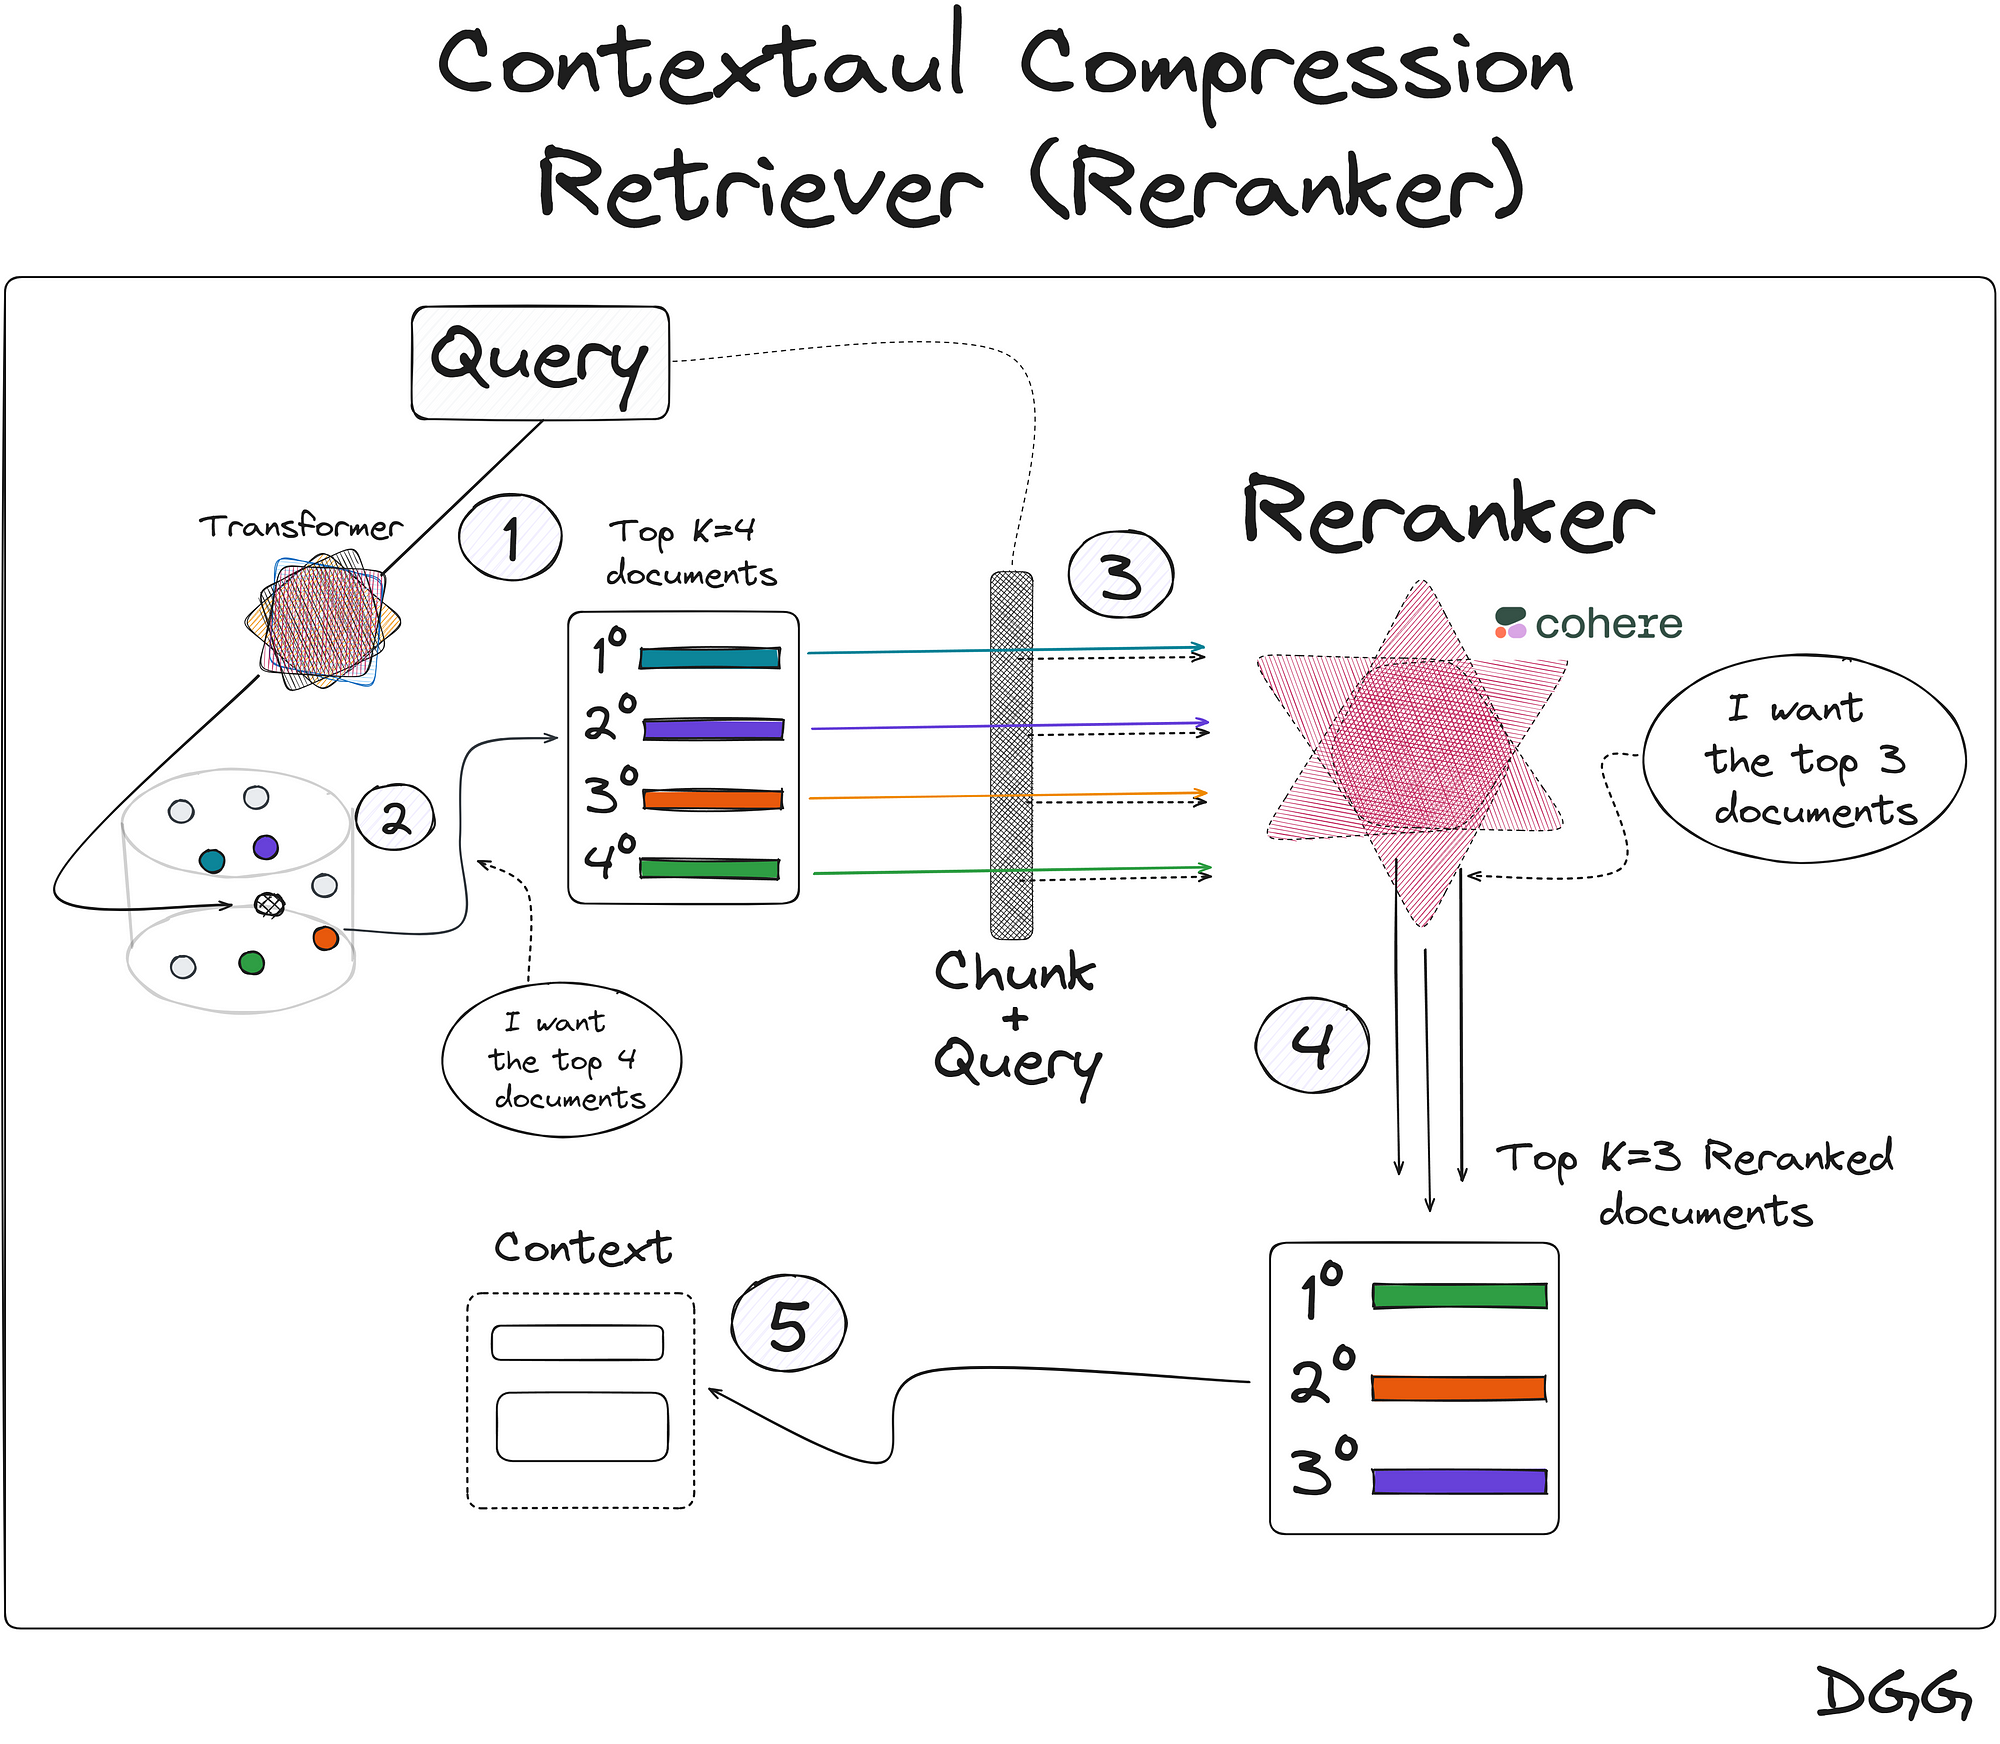

rough workflows

In [ ]:
# pretty_print_docs(compressed_docs)

#         compressed_docs = compression_retriever.invoke(query)
#         chain.invoke(query)
#         chain = RetrievalQA.from_chain_type(llm=llm, retriever=compression_retriever)
        
#               compression_retriever = ContextualCompressionRetriever(base_compressor=pipeline_compressor, base_retriever=retriever)
              
#                     pipeline_compressor = DocumentCompressorPipeline(transformers=[splitter, redundant_filter, relevant_filter])
                    
#                         splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0, separator=". ")
#                         redundant_filter = EmbeddingsRedundantFilter(embeddings=embeddings)
#                         relevant_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)
                        
#                     retriever = FAISS.from_documents(texts, GoogleGenerativeAIEmbeddings(model='models/embedding-001')).as_retriever()
                    


In [11]:
# Helper function for printing docs

def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [1]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [3]:
documents = TextLoader("data/fusion.txt").load()

In [4]:
text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=100)

In [5]:
texts = text_splitter.split_documents(documents)

In [6]:
texts

[Document(metadata={'source': 'data/fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\nproud to say that they were perfectly normal, thank\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\nhold with such nonsense.\nMr. Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\nand blonde and had nearly twice the usual amount of neck, which\ncame in very useful as she spent so much of her time craning over\ngarden fences, spying on the neighbors.  e Dursleys had a small\nson called Dudley and in their opinion there was no fi ner boy\nanywhere.\n e Dursleys had everything they wanted, but they also had a\nsecret, and their greatest fear was that somebody would discover it.\n ey didn’t think they could bear it if anyone found out about the\nPotters.

In [9]:
retriever = FAISS.from_documents(texts, GoogleGenerativeAIEmbeddings(model='models/embedding-001')).as_retriever()

In [10]:
docs = retriever.invoke("What did Mr. Dursley use to do ?")

In [12]:

pretty_print_docs(docs)

Document 1:

M r. and Mrs. Dursley, of number four, Privet Drive, were
proud to say that they were perfectly normal, thank
you very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t
hold with such nonsense.
Mr. Dursley was the director of a fi rm called Grunnings, which
made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin
and blonde and had nearly twice the usual amount of neck, which
came in very useful as she spent so much of her time craning over
garden fences, spying on the neighbors.  e Dursleys had a small
son called Dudley and in their opinion there was no fi ner boy
anywhere.
 e Dursleys had everything they wanted, but they also had a
secret, and their greatest fear was that somebody would discover it.
 ey didn’t think they could bear it if anyone found out about the
Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t met
for s

In [13]:
from langchain_google_genai import GoogleGenerativeAI

In [14]:
llm = GoogleGenerativeAI(model='gemini-1.5-pro',temperature=0)

In [15]:

from langchain.chains import RetrievalQA

In [16]:
chain = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

In [22]:
chain

RetrievalQA(verbose=False, combine_documents_chain=StuffDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n{context}\n\nQuestion: {question}\nHelpful Answer:"), llm=GoogleGenerativeAI(model='gemini-1.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=genai.GenerativeModel(
    model_name='models/gemini-1.5-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)), output_parser=StrOutputParser(), llm_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_variable_name='context'), retriever=VectorStoreRetriever(tags=[

In [17]:
query = "What did Mr. Dursley use to do ?"

In [18]:
chain.invoke(query)

{'query': 'What did Mr. Dursley use to do ?',
 'result': 'Mr. Dursley worked as the director of Grunnings, a firm that made drills.\n'}

In [19]:

print(chain.invoke(query)['result'])

Mr. Dursley was the director of Grunnings, a firm that made drills.



In [20]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [21]:
compressor = LLMChainExtractor.from_llm(llm)

In [23]:
compressor

LLMChainExtractor(llm_chain=PromptTemplate(input_variables=['context', 'question'], input_types={}, output_parser=NoOutputParser(), partial_variables={}, template='Given the following question and context, extract any part of the context *AS IS* that is relevant to answer the question. If none of the context is relevant return NO_OUTPUT. \n\nRemember, *DO NOT* edit the extracted parts of the context.\n\n> Question: {question}\n> Context:\n>>>\n{context}\n>>>\nExtracted relevant parts:')
| GoogleGenerativeAI(model='gemini-1.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=genai.GenerativeModel(
      model_name='models/gemini-1.5-pro',
      generation_config={},
      safety_settings={},
      tools=None,
      system_instruction=None,
      cached_content=None
  ))
| NoOutputParser(), get_input=<function default_get_input at 0x00000197F8BE8C20>)

In [ ]:

# A compressor in the context of natural language processing (NLP) and information retrieval is an algorithm or technique that reduces the dimensionality or size of the input data, such as text or vectors, while preserving the most important information.
# Purpose:
# The primary purpose of a compressor is to:
# Reduce noise: Remove irrelevant or redundant information from the input data.
# Improve efficiency: Decrease the computational resources required to process the data.
# Enhance scalability: Enable the processing of larger datasets.
# Some common compression techniques used in NLP and information retrieval include:
# Vector quantization: Represent high-dimensional vectors using a smaller set of prototype vectors.
# Dimensionality reduction: Use techniques like PCA, t-SNE, or autoencoders to reduce the number of features.
# Text compression: Use algorithms like Huffman coding or LZ77 to compress text data.
# Knowledge distillation: Transfer knowledge from a larger model to a smaller one.

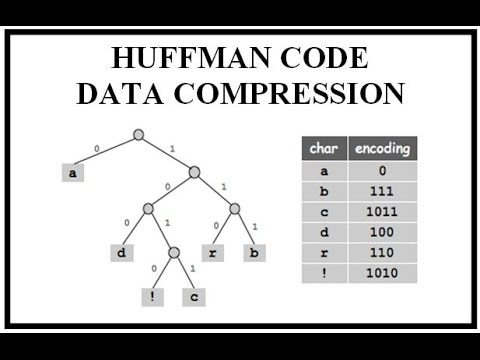 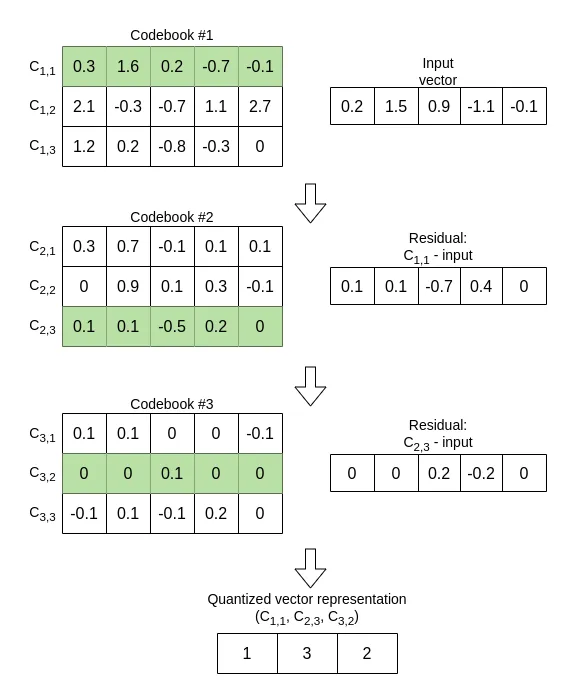

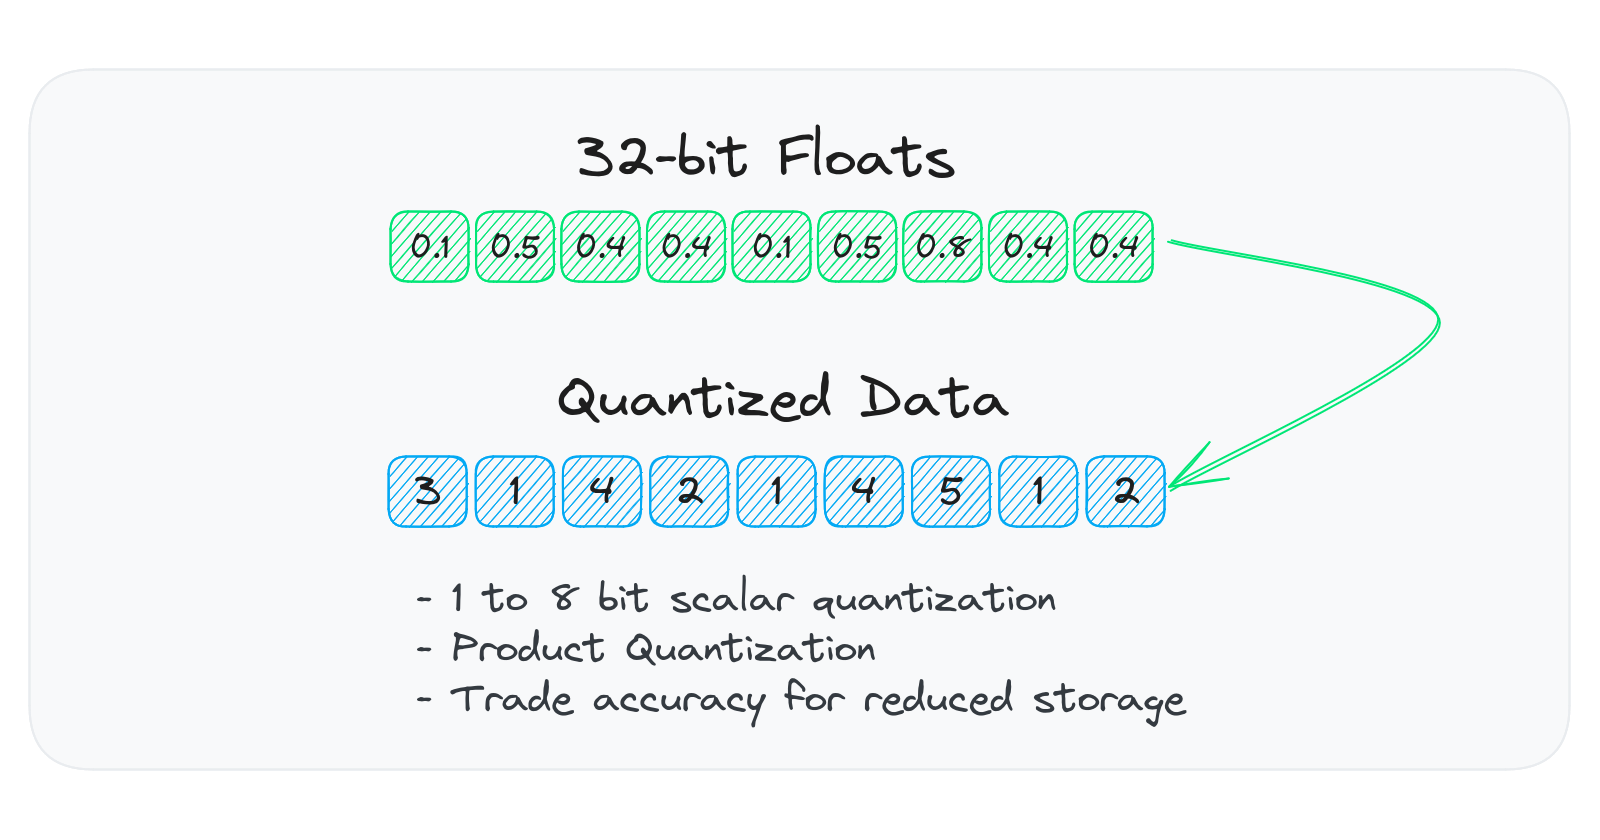

knwoledge distillation

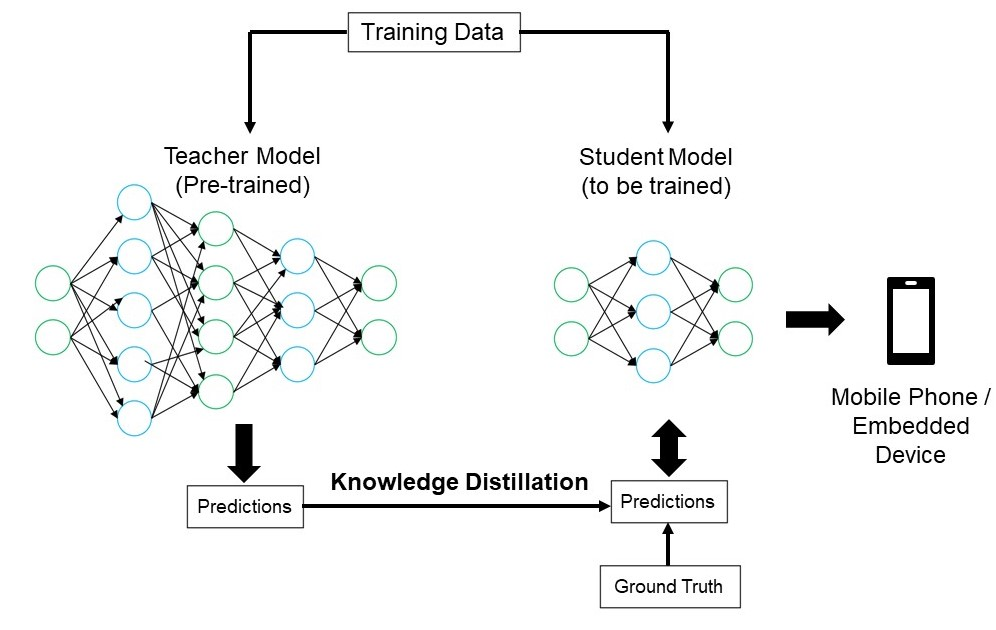

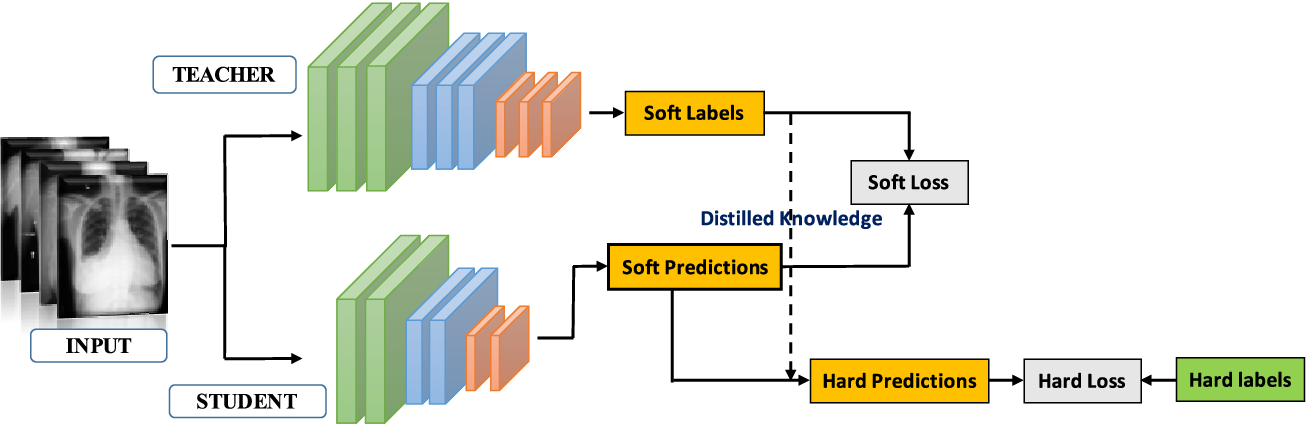

In [24]:
compression_retriever=ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)

In [ ]:

# Here's a breakdown of the compression_retriever line:
# ContextualCompressionRetriever:
# ContextualCompressionRetriever is a class that combines the functionality of a compressor and a retriever.
# Parameters:
# base_compressor=compressor: This parameter specifies the base compressor to use for compressing the input.
# base_retriever=retriever: This parameter specifies the base retriever to use for retrieving information.
# Purpose:
# The ContextualCompressionRetriever class is designed to provide a more efficient and effective way of retrieving information by compressing the input and then using the compressed representation to retrieve relevant information.

In [25]:

compressed_docs = compression_retriever.invoke(query)

In [26]:
compressed_docs

[Document(metadata={'source': 'data/fusion.txt'}, page_content='Mr. Dursley was the director of a fi rm called Grunnings, which\nmade drills.')]

In [27]:

pretty_print_docs(compressed_docs)

Document 1:

Mr. Dursley was the director of a fi rm called Grunnings, which
made drills.


In [28]:

from langchain.retrievers.document_compressors import LLMChainFilter

In [31]:

filters = LLMChainFilter.from_llm(llm)

In [ ]:
# LLMChainFilter
# This line creates a filter object using the LLMChainFilter.from_llm() method, which is initialized with a Large Language Model (LLM) object llm.
# Purpose
# The LLMChainFilter is designed to filter out unwanted or irrelevant responses from the LLM, ensuring that the output is more accurate and relevant.
# Functionality
# Analyzes the input prompt and LLM response.
# Applies filters to remove irrelevant or unwanted content.
# Returns the filtered response.
# Benefits
# Improved accuracy: Filters out irrelevant responses.
# Enhanced relevance: Ensures output is more relevant to the input prompt.
# Better usability: Reduces noise and improves overall user experience.

In [32]:
filters

LLMChainFilter(llm_chain=PromptTemplate(input_variables=['context', 'question'], input_types={}, output_parser=BooleanOutputParser(), partial_variables={}, template="Given the following question and context, return YES if the context is relevant to the question and NO if it isn't.\n\n> Question: {question}\n> Context:\n>>>\n{context}\n>>>\n> Relevant (YES / NO):")
| GoogleGenerativeAI(model='gemini-1.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=genai.GenerativeModel(
      model_name='models/gemini-1.5-pro',
      generation_config={},
      safety_settings={},
      tools=None,
      system_instruction=None,
      cached_content=None
  ))
| BooleanOutputParser(), get_input=<function default_get_input at 0x00000197E8B4A8E0>)

In [33]:

compression_retriever2 = ContextualCompressionRetriever(base_compressor=filter, base_retriever=retriever)

In [34]:
compression_retriever2

ContextualCompressionRetriever(base_compressor=LLMChainFilter(llm_chain=PromptTemplate(input_variables=['context', 'question'], input_types={}, output_parser=BooleanOutputParser(), partial_variables={}, template="Given the following question and context, return YES if the context is relevant to the question and NO if it isn't.\n\n> Question: {question}\n> Context:\n>>>\n{context}\n>>>\n> Relevant (YES / NO):")
| GoogleGenerativeAI(model='gemini-1.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=genai.GenerativeModel(
      model_name='models/gemini-1.5-pro',
      generation_config={},
      safety_settings={},
      tools=None,
      system_instruction=None,
      cached_content=None
  ))
| BooleanOutputParser(), get_input=<function default_get_input at 0x00000197E8B4A8E0>), base_retriever=VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000197E8D4C6D0>, search_kwargs={})

In [35]:
compressed_docs3 = compression_retriever2.invoke(query)
     

In [36]:
compressed_docs3

[Document(id='049f8066-c0c2-4837-948d-43a426e17fe5', metadata={'source': 'data/fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\nproud to say that they were perfectly normal, thank\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\nhold with such nonsense.\nMr. Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\nand blonde and had nearly twice the usual amount of neck, which\ncame in very useful as she spent so much of her time craning over\ngarden fences, spying on the neighbors.  e Dursleys had a small\nson called Dudley and in their opinion there was no fi ner boy\nanywhere.\n e Dursleys had everything they wanted, but they also had a\nsecret, and their greatest fear was that somebody would discover it.\n ey didn’t think they could bear

In [39]:
docs

[Document(id='049f8066-c0c2-4837-948d-43a426e17fe5', metadata={'source': 'data/fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\nproud to say that they were perfectly normal, thank\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\nhold with such nonsense.\nMr. Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\nand blonde and had nearly twice the usual amount of neck, which\ncame in very useful as she spent so much of her time craning over\ngarden fences, spying on the neighbors.  e Dursleys had a small\nson called Dudley and in their opinion there was no fi ner boy\nanywhere.\n e Dursleys had everything they wanted, but they also had a\nsecret, and their greatest fear was that somebody would discover it.\n ey didn’t think they could bear

In [37]:

original_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(docs)]))

In [38]:

original_contexts_len

9226

In [40]:
compressed_docs

[Document(metadata={'source': 'data/fusion.txt'}, page_content='Mr. Dursley was the director of a fi rm called Grunnings, which\nmade drills.')]

In [41]:
compressed_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(compressed_docs)]))

In [42]:
compressed_contexts_len

76

In [43]:

print("Compressed Ratio:", f"{original_contexts_len/(compressed_contexts_len + 1e-5):.2f}x")

Compressed Ratio: 121.39x


In [44]:

from langchain.retrievers.document_compressors import EmbeddingsFilter

In [45]:

from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [54]:

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [55]:
embeddings

GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000197F99ED610>, model='models/embedding-001', task_type=None, google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None)

In [56]:
embeddings_filter = EmbeddingsFilter(embeddings=embeddings)

In [57]:
embeddings_filter

EmbeddingsFilter(embeddings=GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000197F99ED610>, model='models/embedding-001', task_type=None, google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None), similarity_fn=<function cosine_similarity at 0x00000197F731A700>, k=20, similarity_threshold=None)

In [58]:

compression_retriever3 = ContextualCompressionRetriever(base_compressor=embeddings_filter, base_retriever=retriever)

In [ ]:
compressed_docs4 = compression_retriever3.invoke(query)


In [60]:
pretty_print_docs(compressed_docs4)

Document 1:

M r. and Mrs. Dursley, of number four, Privet Drive, were
proud to say that they were perfectly normal, thank
you very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t
hold with such nonsense.
Mr. Dursley was the director of a fi rm called Grunnings, which
made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin
and blonde and had nearly twice the usual amount of neck, which
came in very useful as she spent so much of her time craning over
garden fences, spying on the neighbors.  e Dursleys had a small
son called Dudley and in their opinion there was no fi ner boy
anywhere.
 e Dursleys had everything they wanted, but they also had a
secret, and their greatest fear was that somebody would discover it.
 ey didn’t think they could bear it if anyone found out about the
Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t met
for s

In [61]:
print("Original context length:", original_contexts_len)

Original context length: 9226


In [62]:

compressed_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(compressed_docs)]))

In [63]:

print("Compressed context length:", compressed_contexts_len)

Compressed context length: 76


In [64]:

print("Compressed Ratio:", f"{original_contexts_len/(compressed_contexts_len + 1e-5):.2f}x")

Compressed Ratio: 121.39x


In [65]:
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
from langchain_community.document_transformers import EmbeddingsRedundantFilter
from langchain_text_splitters import CharacterTextSplitter

In [66]:
splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0, separator=". ")

In [67]:

redundant_filter = EmbeddingsRedundantFilter(embeddings=embeddings)

In [68]:
relevant_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)

In [69]:
pipeline_compressor = DocumentCompressorPipeline(transformers=[splitter, redundant_filter, relevant_filter])

In [70]:

compression_retriever = ContextualCompressionRetriever(base_compressor=pipeline_compressor, base_retriever=retriever)

In [71]:
compressed_docs = compression_retriever.invoke(query)


Created a chunk of size 315, which is longer than the specified 300
Created a chunk of size 302, which is longer than the specified 300
Created a chunk of size 308, which is longer than the specified 300


In [72]:
compressed_docs = compression_retriever.invoke(query)
     

Created a chunk of size 315, which is longer than the specified 300
Created a chunk of size 302, which is longer than the specified 300
Created a chunk of size 308, which is longer than the specified 300


In [73]:
compressed_docs

[_DocumentWithState(metadata={'source': 'data/fusion.txt'}, page_content='Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs', state={'embedded_doc': [0.01135273277759552, -0.019231067970395088, -0.020757479593157768, 0.0099785840138793, 0.049456898123025894, 0.0013359056320041418, 0.014308951795101166, 0.015251513570547104, -0.0034130027052015066, 0.009684491902589798, -0.03358995169401169, 0.00785501766949892, 0.002602494088932872, 0.002794622676447034, -0.006127056200057268, 0.01972908526659012, 0.02859296277165413, 0.028048468753695488, -0.00710716238245368, -0.06004558131098747, 0.015023808926343918, 0.04992542788386345, -0.026190970093011856, 0.033483732491731644, -0.027648258954286575, -0.027026787400245667, 0.03017878718674183, -0.09615340828895569, -0.02083056978881359, -0.0045833648182451725, -0.030669746920466423, 0.06781365722417831, -0.030492238700389862, 0.

In [74]:

pretty_print_docs(compressed_docs)

Document 1:

Dursley was the director of a fi rm called Grunnings, which
made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs


In [75]:
from langchain.chains import RetrievalQA

In [76]:

chain = RetrievalQA.from_chain_type(llm=llm, retriever=compression_retriever)

In [77]:

chain.invoke(query)

Created a chunk of size 315, which is longer than the specified 300
Created a chunk of size 302, which is longer than the specified 300
Created a chunk of size 308, which is longer than the specified 300


{'query': 'What did Mr. Dursley use to do ?',
 'result': 'He was the director of Grunnings, a firm that made drills.\n'}

In [78]:

print(chain.invoke(query)['result'])

Created a chunk of size 315, which is longer than the specified 300
Created a chunk of size 302, which is longer than the specified 300
Created a chunk of size 308, which is longer than the specified 300


He was the director of Grunnings, a firm that made drills.

